# Volume 4: River Crossing
    Daniel Perkins
    MATH 439
    1/19/25

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import barycentric_interpolate
from scipy.optimize import root
from scipy.integrate import quad

# Problem 1
Assume that the current is given by $c(x) = −
\frac{7}{10} (x^2 − 1)$. (This function assumes, for example, that the current is faster near the center of the river.) Write a Python
function that accepts as arguments a function $y$, its derivative $y'$, and an $x$-value, and returns $L(x, y(x), y'(x))$ (where $T[y]=\int^1_{-1} L(x,y(x),y'(x))dx$ Use that function to defune a second
function that numerically computes $T[y]$ for a given path $y(x)$.

In [23]:
def L(x, y, y_prime):
    def c(x): return -(7/10.)*(x**2 - 1)  # The current
    a = 1/np.sqrt(1 - c(x)**2)
    left = a * np.sqrt(1 + (a*y_prime(x))**2)
    right = a**2 * c(x) * y_prime(x)
    return left - right  # Equation (19.3)

def T(y, y_prime, a, b):
    def new_L(x): return L(x, y, y_prime)
    result, err = quad(new_L, a, b)  # Guassian quadrature
    return result

# Problem 2

Let y(x) be the straight-line path between A = (−1, 0) and B = (1, 5). Numerically calculate T[y] to get an upper bound on the minimum time required to cross from A to
B. Using (18.2), find a lower bound on the minimum time required to cross.

In [26]:
# Get an upper bound
a, b = -1, 1
def y(x): return (5/2)*x + 5/2  # Straight line from (-1, 0) and B(1, 5)
def y_prime(x): return 5/2*np.ones_like(x)
upper_bound = T(y, y_prime, a, b)  # Calculate T using the given function

# Get a lower bound
xs = np.linspace(-1, 1, 1000)
Ls = L(xs, y, y_prime)
min_L = min(Ls)  # Find the lowest value on the path
lower_bound = min_L

# Print out results
print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 3.8770820491384126
Lower Bound: 1.6666672661558972


# Problem 3

Numerically solve the Euler-Lagrange equation (18.4), using c(x) = −
7
10 (x
2 − 1)
and α = (1 − c
2
)
−1/2
, and y(−1) = 0, y(1) = 5.
Hint: Since this boundary value problem is defined over the doimain [−1, 1], it is easy to
solve using the pseudospectral method. Begin by replacing each d
dx with the pseudospectral
differentiation matrix D. Then impose the boundary conditions and solve.

In [27]:
def cheb(N):   # For pseudospectral method
    x = np.cos((np.pi/N)*np.linspace(0, N, N+1))
    x.shape = (N+1, 1)
    lin = np.linspace(0, N, N+1)
    lin.shape = (N+1, 1)
    
    c = np.ones((N+1, 1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1) # Broadcast along 2nd dimension (columns)
    
    dX = X - X.T
    
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T, axis=0))
    x.shape = (N+1,)
    # Here we return the differentiation matrix and the Chebyshev points,
    # numbered from x_0 = 1 to x_N = -1
    return D[::-1, ::-1], x[::-1]

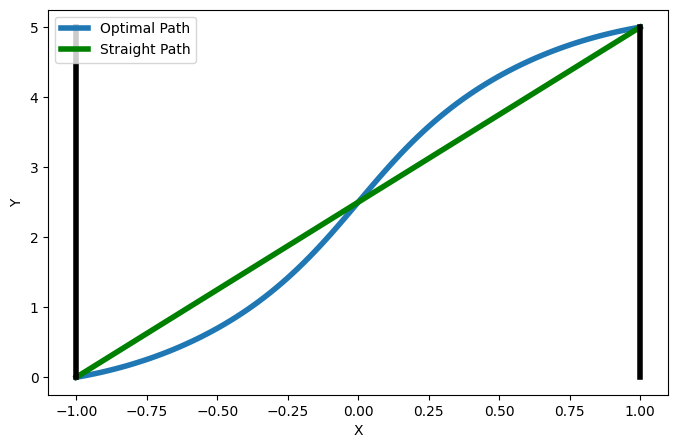

In [44]:
def c(x): return -(7/10.)*(x**2 - 1)  # The current
def a(x): return 1/np.sqrt(1 - c(x)**2)
N = 25
D, x = cheb(N)

# Define F
def F(y):
    y_prime = D @ y
    left = (a(x)**3)*y_prime*(1/np.sqrt(1+(a(x)*y_prime)**2))
    right = (a(x)**2)*c(x)
    L_y_prime = left - right
    out = D @ L_y_prime
    out[0], out[-1] = y[0]-0, y[-1]-5 # Boundary conditions
    return out

guess = (5/2)*x + 5/2
y = root(F, guess).x  

# Get interpolation
x_space = np.linspace(-1, 1, 100)
Interpolation = barycentric_interpolate(x, y, x_space)

# Plot it
plt.figure(figsize=(8, 5))  # Width: 10 inches, Height: 3 inches
plt.plot(x_space, Interpolation, linewidth=4, label="Optimal Path")
plt.plot(x_space, (5/2)*x_space + 5/2, color="green", linewidth=4, label="Straight Path")
plt.plot([-1, -1], [0, 5], color="black", linewidth=4)
plt.plot([1, 1], [0, 5], color="black", linewidth=4)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper left")
plt.show()

# Problem 4

Plot the angle at which the boat should be pointed at each $x$-coordinate. (Hint: use Equation 1.1; see Figure 1.3. Note that the angle the boat should be steered is NOT described by the tangent vector to the trjaectory)

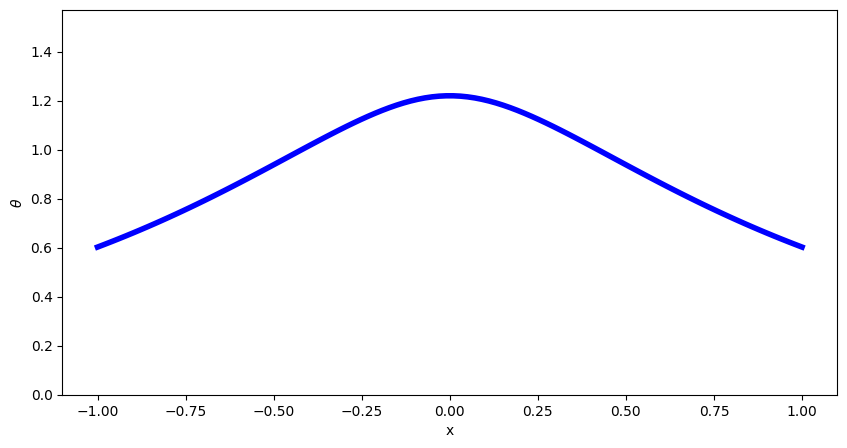

In [53]:
def c(x): return -(7/10.)*(x**2 - 1)  # The current
N = 25
D, x = cheb(N)

# Define F
def F(theta):
    y_prime = D @ y
    right = c(x)*(1/np.cos(theta)) + np.tan(theta)
    return right - y_prime

# Get the approximation
guess = (np.pi/4)*np.ones_like(x)
theta = root(F, guess).x

# Interpolate
x_space = np.linspace(-1, 1, 100)
theta = barycentric_interpolate(x, theta, x_space)

# Plot it
plt.figure(figsize=(10, 5))  # Width: 10 inches, Height: 3 inches
plt.plot(x_space, theta, linewidth=4, color="blue")
plt.ylim(0, np.pi/2)
plt.xlabel("x")
plt.ylabel(r"$\theta$")
plt.show()